In [82]:
####Linear regression###

##Paper -- https://support.sas.com/resources/papers/proceedings/proceedings/sugi22/STATS/PAPER267.PDF
# EDA

# Correlation
# Multicollinearity
# train test split
# model fit
# predictor p-values
# rmse
# residuals
# residual normality
# homoskedasticity
# error independent of one another
#Linearity

In [83]:
import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt # Visualization 
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings      # to ignore warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [84]:
# Dataset Context
# This dataset is created for prediction of Graduate Admissions from an Indian perspective.

# Content
# The dataset contains several parameters which are considered important during the application for Masters Programs.
# The parameters included are :

# GRE Scores ( out of 340 )
# TOEFL Scores ( out of 120 )
# University Rating ( out of 5 )
# Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# Undergraduate GPA ( out of 10 )
# Research Experience ( either 0 or 1 )
# Chance of Admit ( ranging from 0 to 1 )
# Acknowledgements
# This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
# The dataset is owned by Mohan S Acharya.

# Inspiration
# This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

# Citation
# Please cite the following if you are interested in using the dataset :
# Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

# I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

# Import and Explore Data

In [85]:
# Load real estate data set
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


In [86]:
df.shape

(400, 9)

In [87]:
# data=df.copy()

# import pandas_profiling as pp
# data=df.copy()
# report=pp.ProfileReport(data, title='Pandas Profiling Report')  # overview and quick data analysis
# report

In [88]:
print("Columns of the data are:",df.columns)

Columns of the data are: Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [89]:
df=df.rename(columns={'Serial No.':'SerialNo', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL',
                      'University Rating':'UniversityRating','LOR ':'LOR','Chance of Admit ':'ChanceOfAdmit'})
df.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

In [90]:
#Drop the column "Serial No." 
df=df.drop(columns="SerialNo")

In [91]:
df.isnull().sum()

GRE                 0
TOEFL               0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE                 400 non-null int64
TOEFL               400 non-null int64
UniversityRating    400 non-null int64
SOP                 400 non-null float64
LOR                 400 non-null float64
CGPA                400 non-null float64
Research            400 non-null int64
ChanceOfAdmit       400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# Missing Value Analysis

In [93]:
df.isnull().values.any() # check the null values in whole of the data set if any.

False

In [94]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())

GRE
False    400
Name: GRE, dtype: int64
TOEFL
False    400
Name: TOEFL, dtype: int64
UniversityRating
False    400
Name: UniversityRating, dtype: int64
SOP
False    400
Name: SOP, dtype: int64
LOR
False    400
Name: LOR, dtype: int64
CGPA
False    400
Name: CGPA, dtype: int64
Research
False    400
Name: Research, dtype: int64
ChanceOfAdmit
False    400
Name: ChanceOfAdmit, dtype: int64


In [95]:
def missing_percentage(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percent=np.round(total/len(data)*100,2)
    return pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_percentage(df)

,Total,Percent
ChanceOfAdmit,0,0.000
Research,0,0.000
CGPA,0,0.000
LOR,0,0.000
SOP,0,0.000
UniversityRating,0,0.000
TOEFL,0,0.000
GRE,0,0.000


# check any duplicates data in dataframe.

In [96]:
#check any duplicates data in dataframe.
df.duplicated().any()

False

In [97]:
print("Shape of the data",df.shape)

Shape of the data (400, 8)


In [98]:
#statistical summary of the data
df.describe()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,400.000,400.000,400.000,400.000,400.000,400.000,400.000,400.000
mean,316.808,107.410,3.087,3.400,3.453,8.599,0.547,0.724
std,11.474,6.070,1.144,1.007,0.898,0.596,0.498,0.143
min,290.000,92.000,1.000,1.000,1.000,6.800,0.000,0.340
25%,308.000,103.000,2.000,2.500,3.000,8.170,0.000,0.640
50%,317.000,107.000,3.000,3.500,3.500,8.610,1.000,0.730
75%,325.000,112.000,4.000,4.000,4.000,9.062,1.000,0.830
max,340.000,120.000,5.000,5.000,5.000,9.920,1.000,0.970


In [99]:
# Groupby the data by "University rating".
df.groupby("UniversityRating").mean()

,GRE,TOEFL,SOP,LOR,CGPA,Research,ChanceOfAdmit
UniversityRating,,,,,,,
1,303.154,99.077,1.885,2.212,7.746,0.192,0.548
2,309.178,103.523,2.706,2.925,8.184,0.299,0.626
3,315.955,106.887,3.365,3.402,8.552,0.534,0.712
4,324.824,111.824,4.108,4.007,9.022,0.797,0.818
5,328.333,113.667,4.500,4.358,9.291,0.867,0.888


In [100]:
print(" Minimum requirements for more than 85% chance to get admission.\n",df[(df['ChanceOfAdmit']>0.85)].min())

 Minimum requirements for more than 85% chance to get admission.
 GRE                320.000
TOEFL              108.000
UniversityRating     2.000
SOP                  3.000
LOR                  3.000
CGPA                 8.940
Research             0.000
ChanceOfAdmit        0.860
dtype: float64


In [101]:
df.pivot_table(values=['GRE','TOEFL'],index=['UniversityRating'],columns='Research',aggfunc=np.median)

GRE           TOEFL        
Research               0       1       0       1
UniversityRating                                
1                300.000 311.000  99.000  99.000
2                308.000 314.000 103.000 105.000
3                313.000 321.000 105.000 108.000
4                314.000 327.000 110.000 112.000
5                315.500 331.000 108.500 115.000

In [102]:
#%matplotlib inline
import matplotlib.pyplot as plt # Visualization 

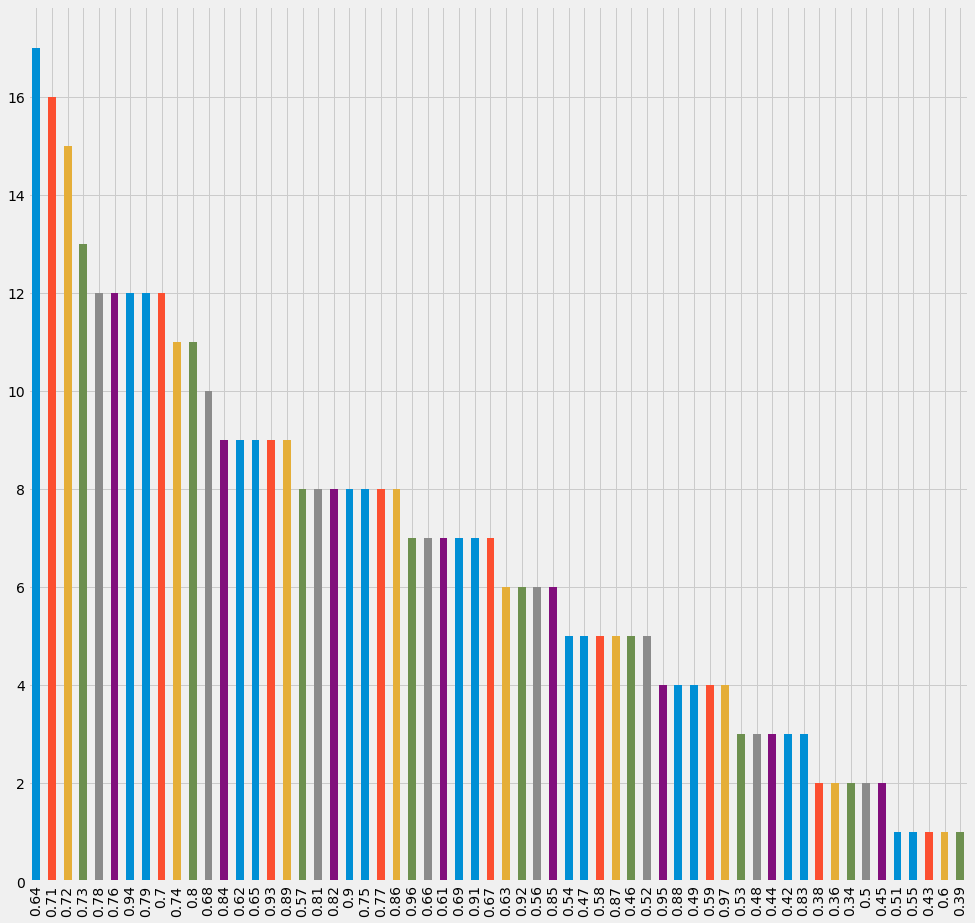

In [103]:
plt.figure(figsize=(15,15))
df['ChanceOfAdmit'].value_counts().plot.bar()
plt.show()

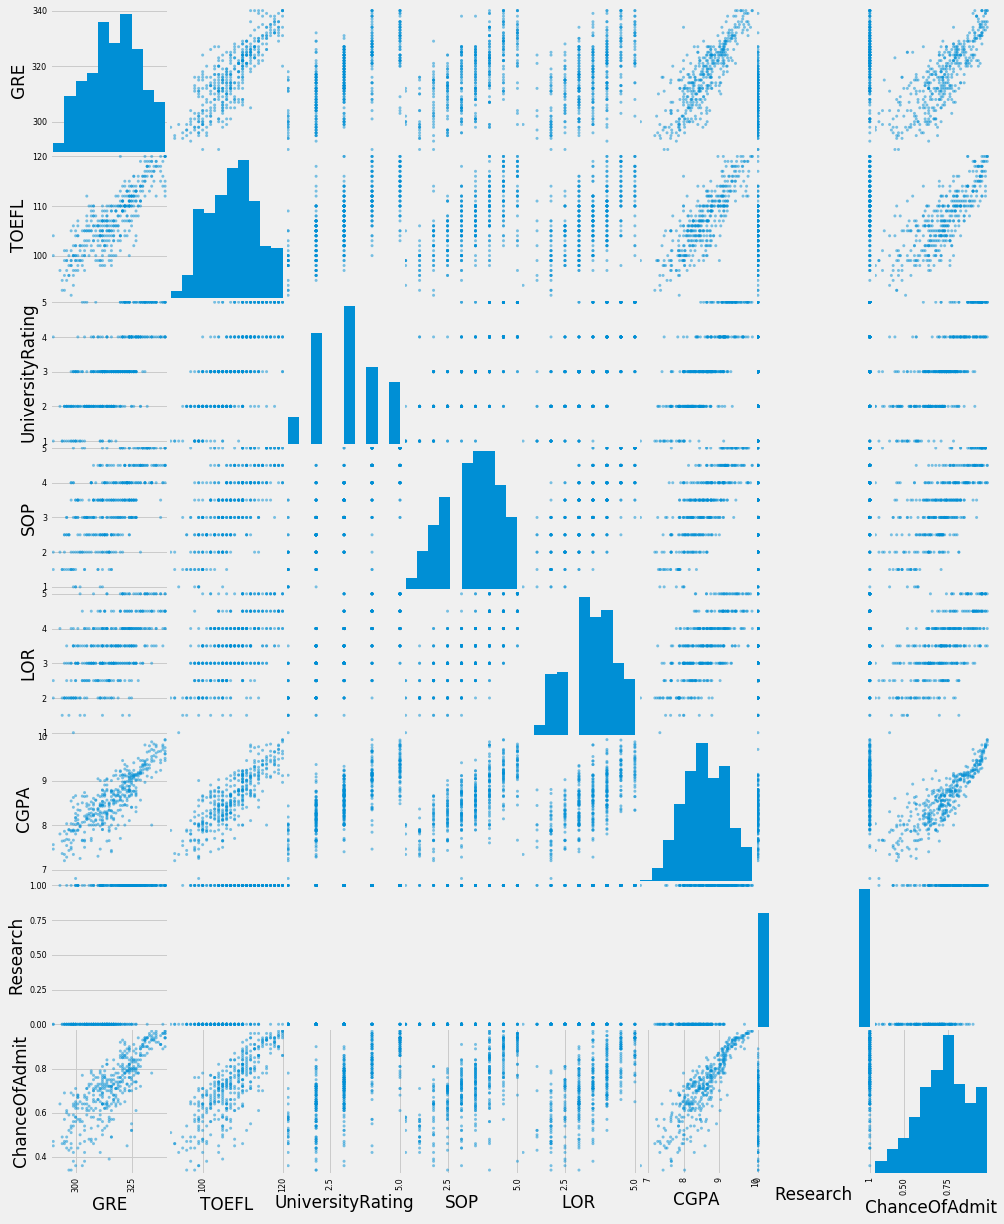

In [104]:
#relashionship between the variables of the data in scatter form.
pd.plotting.scatter_matrix(df,figsize=(15,20)) # Scatter matrix for the data.
plt.show()

In [105]:
# sns.pairplot(df,hue="ChanceOfAdmit")
# plt.show()
#df.head()

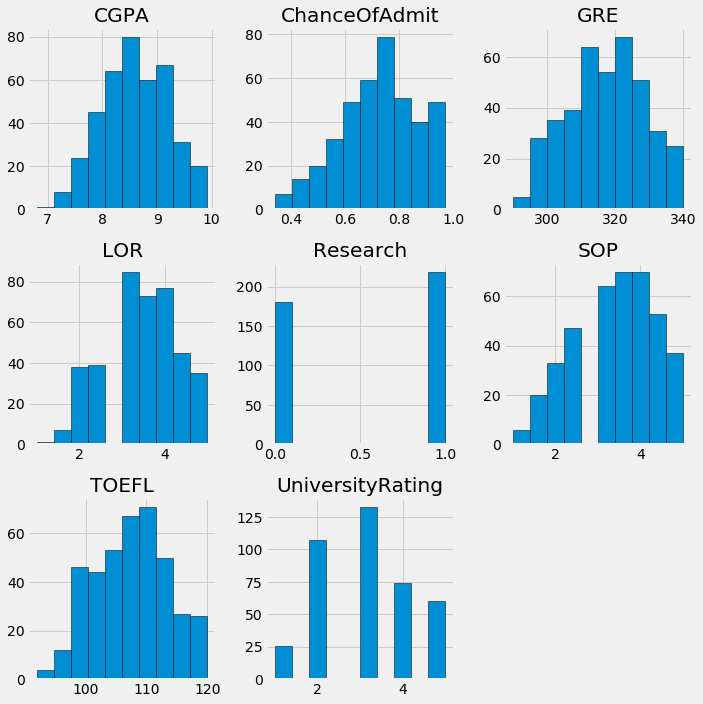

In [106]:
df.hist(figsize=(10,10),edgecolor="k")
plt.tight_layout()
plt.show()

In [156]:
# plt.figure(figsize=(15,12))
# col_list=df.columns
 
# for i in range(len(df.columns)):
#     plt.subplot(3,3,i+1)
#     plt.hist(df[col_list[i]],edgecolor="w")
#     plt.title(col_list[i],color="g",fontsize=15)


# plt.show()

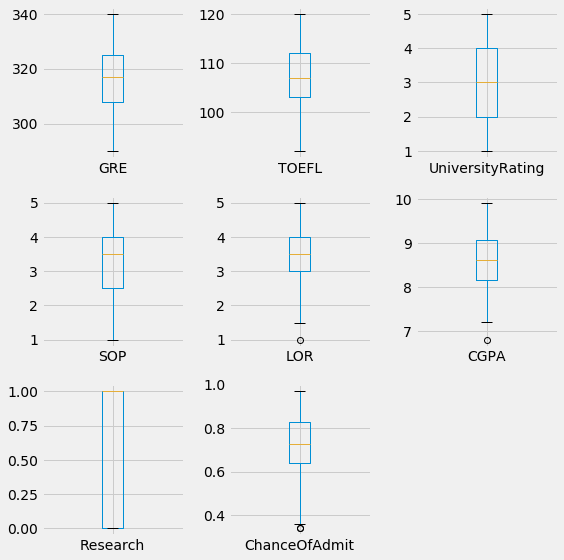

In [108]:
#Boxplot for all variables.
"""for col in df.columns:
    df[[col]].boxplot()
    plt.show()"""
df.plot(kind='box',subplots=True,layout=(3,3),grid=True,figsize=(8,8))
plt.tight_layout()

plt.show()

In [109]:
# Correlation Between the data features.
df.corr()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GRE,1.000,0.836,0.669,0.613,0.558,0.833,0.580,0.803
TOEFL,0.836,1.000,0.696,0.658,0.568,0.828,0.490,0.792
UniversityRating,0.669,0.696,1.000,0.735,0.660,0.746,0.448,0.711
SOP,0.613,0.658,0.735,1.000,0.730,0.718,0.444,0.676
LOR,0.558,0.568,0.660,0.730,1.000,0.670,0.397,0.670
CGPA,0.833,0.828,0.746,0.718,0.670,1.000,0.522,0.873
Research,0.580,0.490,0.448,0.444,0.397,0.522,1.000,0.553
ChanceOfAdmit,0.803,0.792,0.711,0.676,0.670,0.873,0.553,1.000


In [110]:
df.dtypes

GRE                   int64
TOEFL                 int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

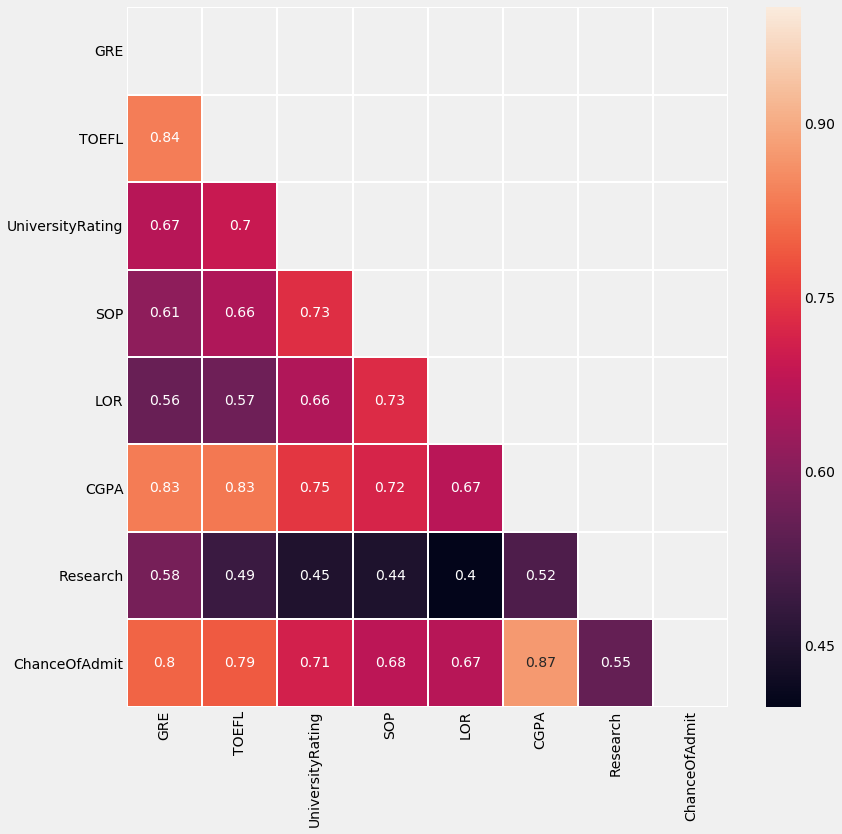

In [111]:
#heatmap of the correlation of the data variables.
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=1.0)
plt.show()

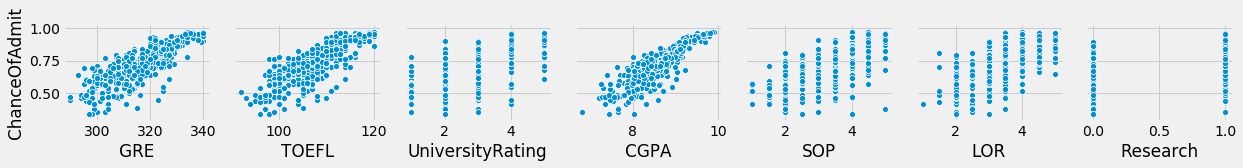

In [112]:
sns.pairplot(df,x_vars=['GRE','TOEFL','UniversityRating','CGPA','SOP','LOR','Research'],
             y_vars='ChanceOfAdmit')
plt.tight_layout()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Divide the data into train and test###

In [114]:
###Divide the data into train and test###

msk = np.random.rand(len(df)) < 0.8
#msk

In [115]:
train = df[msk]

test = df[~msk]

In [116]:
train.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.500,4.500,9.650,1,0.920
3,322,110,3,3.500,2.500,8.670,1,0.800
5,330,115,5,4.500,3.000,9.340,1,0.900
6,321,109,3,3.000,4.000,8.200,1,0.750
7,308,101,2,3.000,4.000,7.900,0,0.680


In [117]:
train.shape

(324, 8)

In [118]:
test.shape

(76, 8)

In [119]:
train.columns

Index(['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research',
       'ChanceOfAdmit'],
      dtype='object')

# Model Fit

In [120]:
##Multiple###
# Initialize model
regression_model_m = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model_m.fit(X = pd.DataFrame(train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]), 
                     y = train["ChanceOfAdmit"])

# Check trained model y-intercept
print(regression_model_m.intercept_)

# Check trained model coefficients
print(regression_model_m.coef_)

-1.195786056559001
[ 0.00184774  0.00282383  0.00471945 -0.00038997  0.02294285  0.10745195
  0.03026263]


# Getting p-values of coeficients###

In [121]:
import statsmodels.api as sm

In [122]:
mod = sm.OLS(train["ChanceOfAdmit"],train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']])

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
p_values

GRE                0.000
TOEFL              0.023
UniversityRating   0.001
SOP                0.397
LOR                0.000
CGPA               0.000
Research           0.000
Name: P>|t|, dtype: float64

In [123]:
##P-Values
#regression_model_m

# To calculate the p-values of beta coefficients: 
#print("coef_pval:\n", stats.coef_pval(regression_model_m,train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']], train["ChanceOfAdmit"]))

# train.columns
# # # to print summary table:
# # print("\n=========== SUMMARY ===========")
# # xlabels = boston.feature_names[train["ChanceOfAdmit"]]
# xlabels = np.array(['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research','ChanceOfAdmit'])
# stats.summary(regression_model_m,train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']], train["ChanceOfAdmit"], xlabels)


# R squared ###

In [124]:
# SST( Total sum of squares)  =  SSR( sum of squared regression)   + SSE ( sum of squared errors of prediction)
# R2  = SSR/SST   = 1 - (SSE/SST)

# SST =   sum((yi - ybar)2)    SSR =   sum((yipred - ybar)2)    SSE = sum((yi - yipred )2) 

# ybar ---->yipred---->yi

In [125]:
####R squared multiple###
R2 = regression_model_m.score(X = pd.DataFrame(train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]), 
                       y = train["ChanceOfAdmit"])
R2

0.8165901669768608

In [126]:
N= train.shape[0]
p = 7
N

324

In [127]:
# Adjusted R squared

# Adjusted R squared =  1 -   ( ( 1- R2)(N - 1))/ ( N - p -1)
# N - Sample size 
# p - total predictors

AdjustedR2 = 1 -   ( ( 1- R2)*(N - 1))/ ( N - p -1)
AdjustedR2

0.8125272909288799

In [128]:
##Multiple###
train_prediction_m = regression_model_m.predict(X = pd.DataFrame(train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]))
test_prediction_m = regression_model_m.predict(X = pd.DataFrame(test[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]))

# Actual_m - prediction_m = residuals_m
residuals_m = train["ChanceOfAdmit"] - train_prediction_m

residuals_m.describe()

count   324.000
mean      0.000
std       0.061
min      -0.262
25%      -0.022
50%       0.009
75%       0.036
max       0.161
Name: ChanceOfAdmit, dtype: float64

In [129]:
SSResiduals = (residuals_m**2).sum()

SSTotal = ((train["ChanceOfAdmit"] - train["ChanceOfAdmit"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.8165901669768609

# Root Mean Squared Error#####

In [130]:
####RMSE train##
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction_m, train["ChanceOfAdmit"])

0.060424266378166516

In [131]:
####RMSE test##

rmse(test_prediction_m, test["ChanceOfAdmit"])

0.0744821102881183

In [136]:
####RMSE train from library###
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction_m, train["ChanceOfAdmit"])**0.5

RMSE

0.06042426637816651

In [137]:
train.shape

(324, 9)

In [138]:
train.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit,ChanceOfAdmit_pred
0,337,118,4,4.500,4.500,9.650,1,0.920,0.948
3,322,110,3,3.500,2.500,8.670,1,0.800,0.742
5,330,115,5,4.500,3.000,9.340,1,0.900,0.863
6,321,109,3,3.000,4.000,8.200,1,0.750,0.721
7,308,101,2,3.000,4.000,7.900,0,0.680,0.607


In [139]:
train['ChanceOfAdmit_pred'] = train_prediction_m
train.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit,ChanceOfAdmit_pred
0,337,118,4,4.500,4.500,9.650,1,0.920,0.948
3,322,110,3,3.500,2.500,8.670,1,0.800,0.742
5,330,115,5,4.500,3.000,9.340,1,0.900,0.863
6,321,109,3,3.000,4.000,8.200,1,0.750,0.721
7,308,101,2,3.000,4.000,7.900,0,0.680,0.607


# Mean Absoluate Percentage Error####

In [143]:
Error = np.sum(np.abs(np.subtract(train['ChanceOfAdmit'],train['ChanceOfAdmit_pred'])))
Average = np.sum(train['ChanceOfAdmit'])
MAPE = (Error/Average) * 100
MAPE

5.906127867087892

In [79]:
train_prediction_m.shape

(324,)

# Testing of Assumptions

# 1.  Normality of Errors

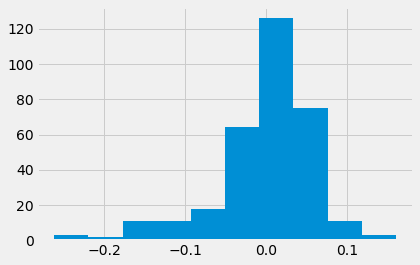

In [147]:
# residual histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# histogram plot
pyplot.hist(residuals_m)
pyplot.show()

In [148]:
# normality test
from scipy.stats import shapiro
stat, p = shapiro(residuals_m)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.914, p=0.000
Sample does not look Gaussian (reject H0)


# 2. Homoskedasticity

(0.4, 1)

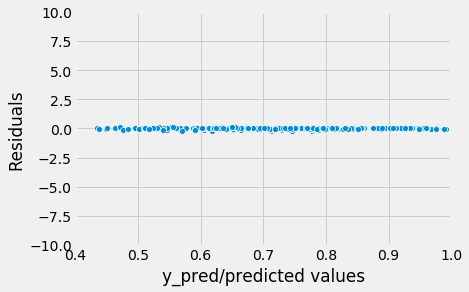

In [149]:
##Detecting heteroscedasticity!
p = sns.scatterplot(train_prediction_m,residuals_m)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0.4,1)
#p = sns.lineplot([0,26],[0,0],color='blue')
#p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
##Goldfeld Quandt Test
#import statsmodels.stats.api as sms
#from statsmodels.compat import lzip

In [ ]:
# name = ['F statistic', 'p-value']
# test = sms.het_goldfeldquandt(residuals, X_train)
# lzip(name, test)

# 3. Autocorrelation of residuals

(0.4, 1)

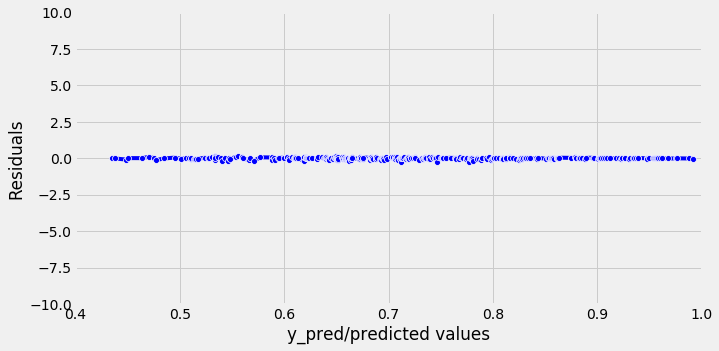

In [151]:
##No autocorrelation of residuals
plt.figure(figsize=(10,5))
p = sns.lineplot(train_prediction_m,residuals_m,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0.4,1)
#p = sns.lineplot([0,2],[0,0],color='red')
#p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [153]:

##Ljung-Box test for no autocorrelation of residuals
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals_m , lags = 40)[1])

# Null Hypothesis: Error terms are autocorrelated.
# Alternative Hypothesis: Error terms is not autocorrelated.
#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

1.1362841638718275e-40

In [ ]:
#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

# 4. Multicollinearity Variance Inflation Factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [60]:
# calculating VIF for each feature 
# VIF dataframe 

X = train[['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

            feature      VIF
0               GRE 1422.777
1             TOEFL 1362.663
2  UniversityRating   22.051
3               SOP   38.939
4               LOR   40.447
5              CGPA 1035.616
6          Research    2.786


In [61]:
# calculating VIF for each feature 
# VIF dataframe 

X = train[[ 'CGPA', 'Research']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

    feature   VIF
0      CGPA 2.309
1  Research 2.309


# 5. Checking Linearity##

In [171]:
from scipy.stats import norm
from scipy import stats
x1 = norm.rvs( loc = 10,  size = 50)
x1

array([10.38409915,  8.98278941,  9.04768321,  9.65485037, 10.39831236,
        9.25583043,  8.95653834, 10.95615453, 10.29554985,  9.54389887,
       10.43435198, 11.27269004,  8.42046927,  7.61422676, 11.19245669,
        9.55655542, 10.16267988, 11.72144786,  9.62936189,  9.98760795,
       10.06132728, 10.9011833 , 11.3079169 ,  8.01086027, 10.01908052,
        8.67809056, 10.232656  , 11.17627224,  9.03989377,  9.79357074,
        8.33415955, 11.19343713, 10.82159579, 10.42045991, 11.45179226,
       10.36238713,  9.28620558,  8.46159276,  9.40169669,  9.63895992,
        9.36375455,  8.19858765,  9.78809427,  9.03504832,  9.67150031,
       11.3824852 ,  8.85355255, 10.30952746,  9.72218353, 10.86457185])

In [172]:
test_df = pd.DataFrame(x1)
test_df.columns = ['y']
test_df['x1'] = np.exp(test_df['y'])
test_df.head()

,y,x1
0,10.384,32341.262
1,8.983,7964.818
2,9.048,8498.825
3,9.655,15597.257
4,10.398,32804.217


In [173]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

# Scatter Plot
layout = go.Layout(title = 'y Vs x1',
                   xaxis = dict (title = 'x1'),
                   yaxis = dict (title = 'y'),
                   hovermode='closest')

data = [go.Scatter(x = test_df['x1'],y = test_df['y'], mode='markers')]

# Create Figure Object
figure = go.Figure(data=data,layout=layout)
# Plot the figure
figure.show()

In [176]:
test_df['x2'] = np.log(test_df['x1'])

In [177]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

# Scatter Plot
layout = go.Layout(title = 'y Vs x2',
                   xaxis = dict (title = 'x2'),
                   yaxis = dict (title = 'y'),
                   hovermode='closest')

data = [go.Scatter(x = test_df['x2'],y = test_df['y'], mode='markers')]

# Create Figure Object
figure = go.Figure(data=data,layout=layout)
# Plot the figure
figure.show()